🏆 Top 10 countries with higher growth average (% anual):
country_name
Tajikistan     0.069170
Bangladesh     0.059926
Philippines    0.058548
China          0.057157
Tanzania       0.056450
Cambodia       0.055927
Rwanda         0.055479
Myanmar        0.054970
Lao PDR        0.054298
Viet Nam       0.053465
Name: GDP Growth (% Annual) Corrected, dtype: float64


C:\Users\34641\AppData\Local\Temp\ipykernel_17428\3836785216.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_growth.values, y=top10_growth.index, palette="viridis")


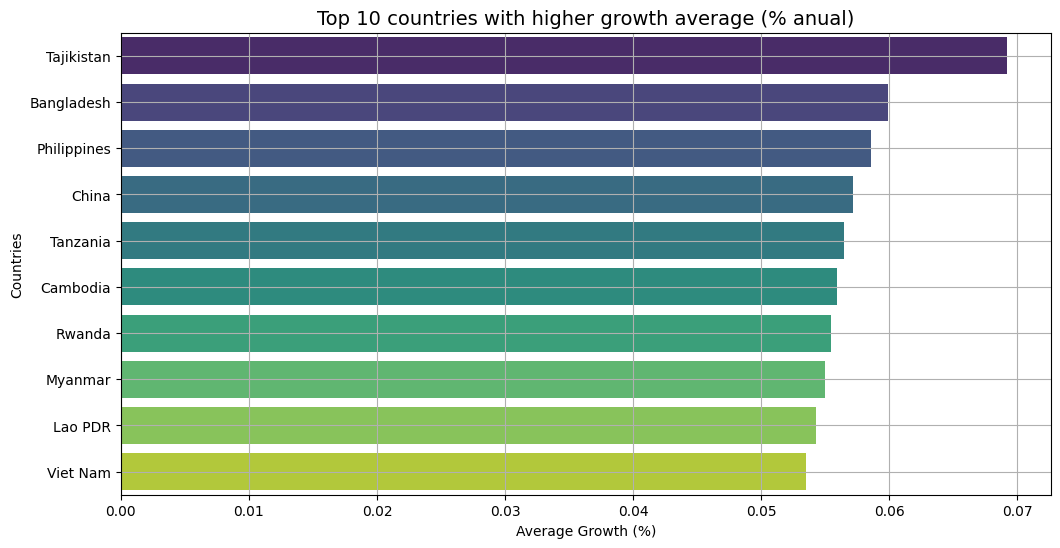

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("D:/Curso Análisis de Datos/Final Project/dataset_world_economics_cleaned.xlsx")

df_growth = df.dropna(subset=['GDP Growth (% Annual) Corrected'])

top10_growth = df_growth.groupby('country_name')['GDP Growth (% Annual) Corrected'] \
                        .mean().sort_values(ascending=False).head(10)

print(" Top 10 countries with higher growth average (% anual):")
print(top10_growth)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_growth.values, y=top10_growth.index, palette="viridis")
plt.title("Top 10 countries with higher growth average (% anual)", fontsize=14)
plt.xlabel("Average Growth (%)")
plt.ylabel("Countries")
plt.grid(True)
plt.show()

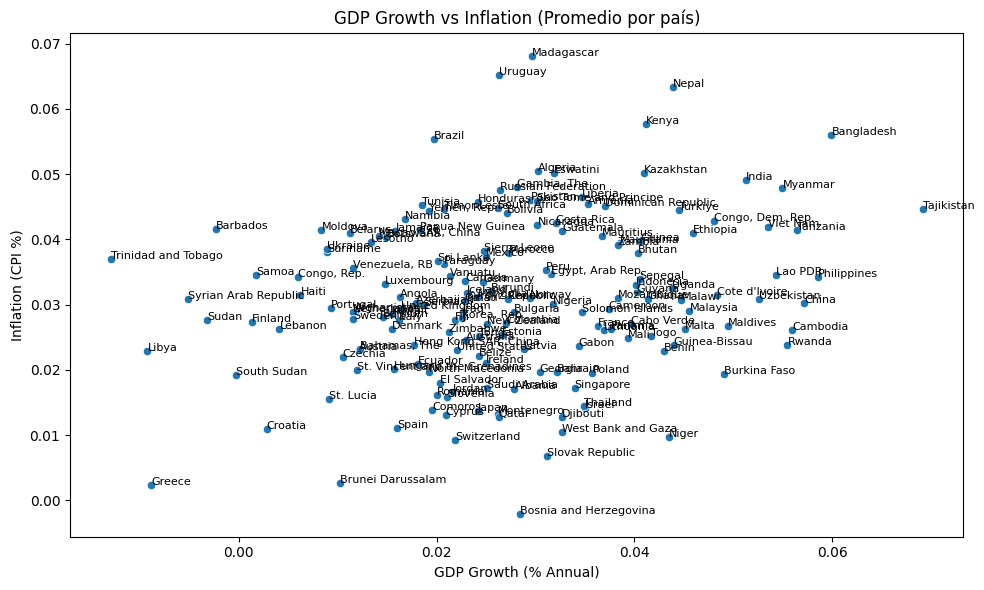

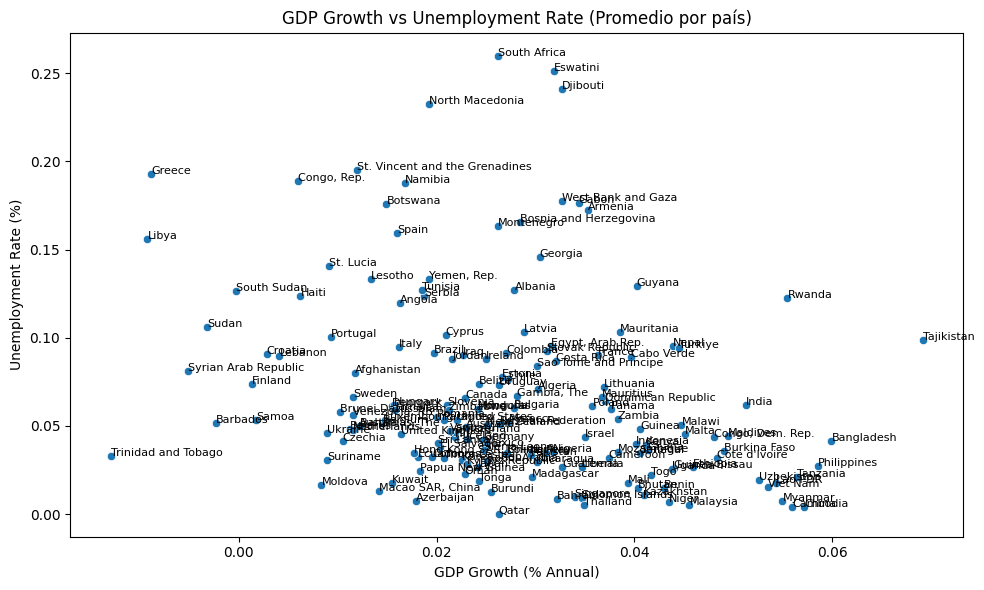

In [ ]:

df_bi = df[[
    "country_name", "year",
    "GDP Growth (% Annual) Corrected",
    "Inflation (CPI %)  Corrected",
    "Unemployment Rate (%) Corrected"
]].dropna()

df_avg = df_bi.groupby("country_name").mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_avg,
    x="GDP Growth (% Annual) Corrected",
    y="Inflation (CPI %)  Corrected"
)

for i in range(len(df_avg)):
    plt.text(
        df_avg["GDP Growth (% Annual) Corrected"][i],
        df_avg["Inflation (CPI %)  Corrected"][i],
        df_avg["country_name"][i],
        fontsize=8
    )

plt.title("GDP Growth vs Inflation ")
plt.xlabel("GDP Growth (% Annual)")
plt.ylabel("Inflation (CPI %)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_avg,
    x="GDP Growth (% Annual) Corrected",
    y="Unemployment Rate (%) Corrected"
)

for i in range(len(df_avg)):
    plt.text(
        df_avg["GDP Growth (% Annual) Corrected"][i],
        df_avg["Unemployment Rate (%) Corrected"][i],
        df_avg["country_name"][i],
        fontsize=8
    )

plt.title("GDP Growth vs Unemployment Rate")
plt.xlabel("GDP Growth (% Annual)")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()



In [ ]:
df_avg["score_growth_inflation"] = df_avg["GDP Growth (% Annual) Corrected"] - df_avg["Inflation (CPI %)  Corrected"]
df_avg["score_growth_unemployment"] = df_avg["GDP Growth (% Annual) Corrected"] - df_avg["Unemployment Rate (%) Corrected"]

top10_growth_inflation = df_avg.sort_values(by="score_growth_inflation", ascending=False).head(20)

top10_growth_unemployment = df_avg.sort_values(by="score_growth_unemployment", ascending=False).head(20)

print(" Top 10 países (Crecimiento vs Inflación):")
print(top10_growth_inflation[["country_name", "score_growth_inflation"]])

print("\n Top 10 países (Crecimiento vs Desempleo):")
print(top10_growth_unemployment[["country_name", "score_growth_unemployment"]])

✅ Top 10 países (Crecimiento vs Inflación):
               country_name  score_growth_inflation
110                   Niger                0.033725
126                  Rwanda                0.031712
18   Bosnia and Herzegovina                0.030449
26                 Cambodia                0.029842
23             Burkina Faso                0.029763
30                    China                0.026838
148              Tajikistan                0.024585
134         Slovak Republic                0.024374
120             Philippines                0.024273
93                 Maldives                0.022746
166      West Bank and Gaza                0.022126
162              Uzbekistan                0.021750
71                   Israel                0.020778
150                Thailand                0.020497
60            Guinea-Bissau                0.020218
15                    Benin                0.020167
41                 Djibouti                0.019841
81                  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_avg = df.groupby("country_name")[[
    "GDP Growth (% Annual) Corrected",
    "Inflation (CPI %)  Corrected",
    "Unemployment Rate (%) Corrected",
    "GDP per Capita (Current USD) Corrected",
    "Current Account Balance (% GDP)  Corrected"
]].mean().dropna()

positivos = [
    "GDP Growth (% Annual) Corrected",
    "GDP per Capita (Current USD) Corrected",
    "Current Account Balance (% GDP)  Corrected"
]

negativos = [
    "Inflation (CPI %)  Corrected",
    "Unemployment Rate (%) Corrected"
]

scaler = MinMaxScaler()
df_score = df_avg.copy()

df_score[positivos] = scaler.fit_transform(df_score[positivos])

df_score[negativos] = 1 - scaler.fit_transform(df_score[negativos])

df_score["Investment Score"] = df_score.mean(axis=1)

top10_investment = df_score["Investment Score"].sort_values(ascending=False).head(10).reset_index()
print(top10_investment)

    country_name  Investment Score
0    Switzerland          0.791366
1       Thailand          0.722891
2          China          0.718530
3      Singapore          0.712034
4          Qatar          0.706331
5   Burkina Faso          0.696240
6          Niger          0.691366
7           Togo          0.682120
8  Guinea-Bissau          0.681753
9          Japan          0.677885


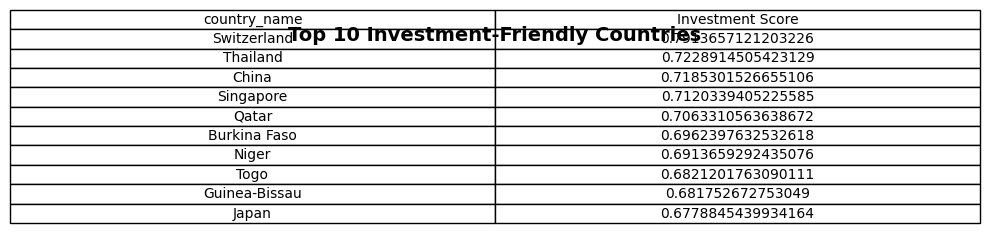

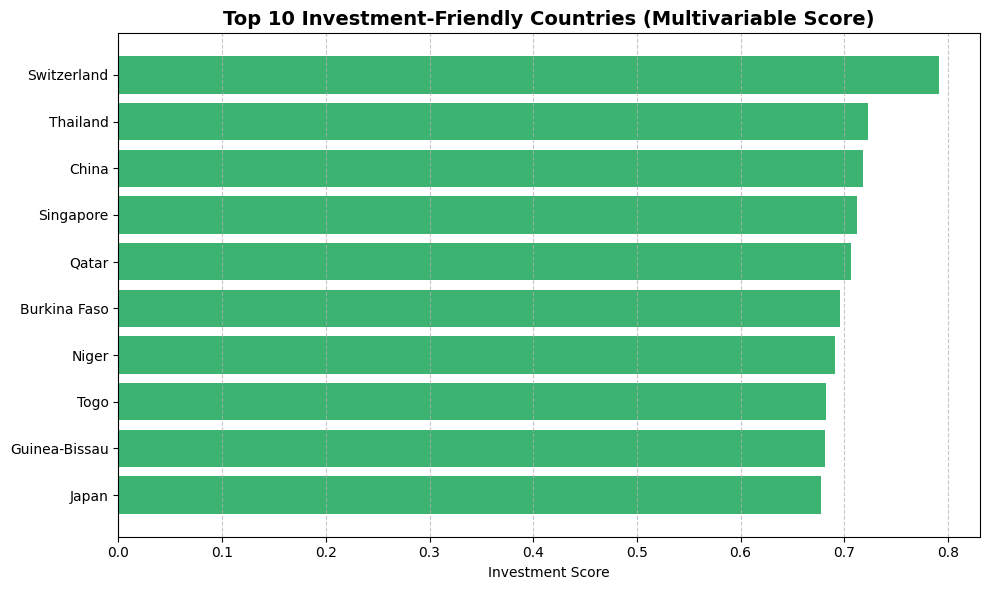

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 3))
ax.axis("off")

table = ax.table(
    cellText=top10_investment.values,
    colLabels=top10_investment.columns,
    cellLoc='center',
    loc='center'
)

table.scale(1, 2)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.title("Top 10 Investment-Friendly Countries", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.barh(top10_investment['country_name'], top10_investment['Investment Score'], color='mediumseagreen')
plt.xlabel('Investment Score')
plt.title('Top 10 Investment-Friendly Countries (Multivariable Score)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()